## 数据挖掘、机器学习、深度学习的区别

- 数据挖掘：指从数据库中的大量数据中揭示出隐含的、先前未知的、具有潜在价值的信息和知识的过程。

# 
NEL定理

超参数
局部加权线性回归
权重与回归系数
高斯核

高斯噪声
最大似然估计

交叉熵--分类
均方差--回归

Starting b = 0, k = 0, error = 92.34182926829268
Running...
After 100 iterations b = 0.28365718369791265, k = 1.973714877188886, error = 0.7805536538831687


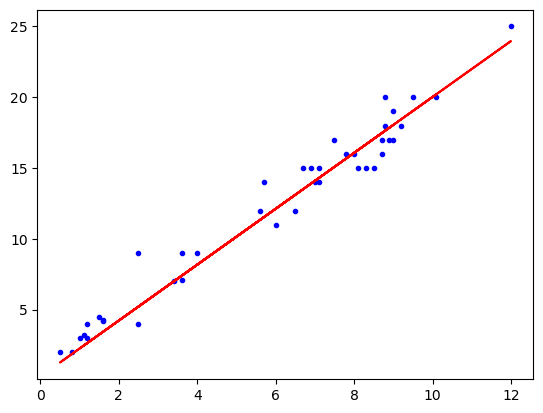

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # 1111
# 载入数据
data = np.genfromtxt("data.csv", delimiter=",")
x_data = data[:,0]
y_data = data[:,1]


# 学习率learning rate
lr = 0.001
# 截距
b = 0
# 斜率
k = 0
# 最大迭代次数
epochs = 100

# 最小二乘法
def compute_error(b, k, x_data, y_data):
    totalError = 0
    for i in range(0, len(x_data)):
        totalError += (y_data[i] - (k * x_data[i] + b)) ** 2
    return totalError / float(len(x_data)) / 2.0

# 训练用的函数
def gradient_descent_runner(x_data, y_data, b, k, lr, epochs):
    # 计算总数据量
    m = float(len(x_data))
    # 循环epochs次
    for i in range(epochs):
        b_grad = 0
        k_grad = 0
        # 计算梯度的总和再求平均
        for j in range(0, len(x_data)):
            b_grad += (1/m) * (((k * x_data[j]) + b) - y_data[j])
            k_grad += (1/m) * x_data[j] * (((k * x_data[j]) + b) - y_data[j])
        # 更新b和k
        b = b - (lr * b_grad)
        k = k - (lr * k_grad)
    return b, k

print("Starting b = {0}, k = {1}, error = {2}".format(b, k, compute_error(b, k, x_data, y_data)))
print("Running...")
b, k = gradient_descent_runner(x_data, y_data, b, k, lr, epochs)
print("After {0} iterations b = {1}, k = {2}, error = {3}".format(epochs, b, k, compute_error(b, k, x_data, y_data)))

#画图
plt.plot(x_data, y_data, 'b.')
plt.plot(x_data, k*x_data + b, 'r')
plt.show()

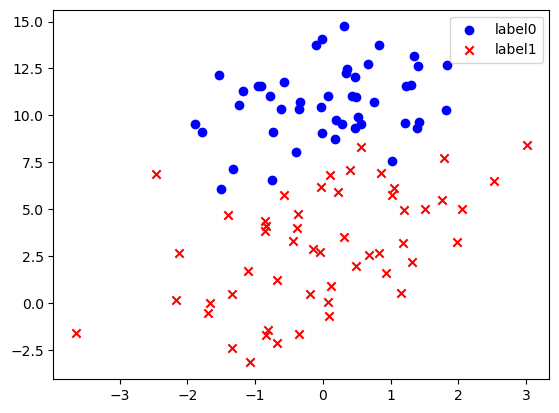

(100, 2)
(100, 1)
[[ 2.05836354]
 [ 0.3510579 ]
 [-0.36341304]]


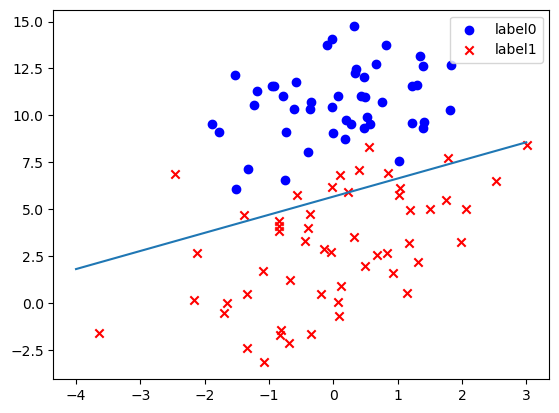

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing

# 数据是否需要标准化
scale = False

# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:, :-1]
y_data = data[:, -1]


def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    # 切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i, 0])
            y0.append(x_data[i, 1])
        else:
            x1.append(x_data[i, 0])
            y1.append(x_data[i, 1])

    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    # 画图例
    plt.legend(handles=[scatter0, scatter1], labels=['label0', 'label1'], loc='best')


plot()
# 查看数据
plt.show()

# 数据处理，添加偏置项
x_data = data[:, :-1]
y_data = data[:, -1, np.newaxis]

print(np.mat(x_data).shape)
print(np.mat(y_data).shape)
# 给样本添加偏置项
X_data = np.concatenate((np.ones((100, 1)), x_data), axis=1)


def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat * ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat * ws)))
    return np.sum(left + right) / -(len(xMat))


def gradAscent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)

    lr = 0.001
    epochs = 10000
    costList = []
    # 计算数据行列数
    # 行代表数据个数，列代表权值个数
    m, n = np.shape(xMat)
    # 初始化权值
    ws = np.mat(np.ones((n, 1)))

    for i in range(epochs + 1):
        # xMat和weights矩阵相乘
        h = sigmoid(xMat * ws)
        # 计算误差
        ws_grad = xMat.T * (h - yMat) / m
        ws = ws - lr * ws_grad

        if i % 50 == 0:
            costList.append(cost(xMat, yMat, ws))
    return ws, costList


# 训练模型，得到权值和cost值的变化
ws, costList = gradAscent(X_data, y_data)
print(ws)

if scale == True:
    # 画图决策边界
    plot()
    x_test = [[-4], [3]]
    y_test = (-ws[0] - x_test * ws[1]) / ws[2]
    plt.plot(x_test, y_test)